In [1]:
import numpy as np
import matplotlib.pyplot as plt


def poly_fit(points):
    X = np.zeros((len(points), 2))
    Y = np.zeros((len(points), 1))

    for i, point in enumerate(points):
        X[i, :] = [point[0], 1]
        Y[i] = point[1]

    coefs = np.linalg.inv(X.T @ X) @ X.T @ Y

    return coefs


def predict(x, coefs):
    return coefs[0] * x + coefs[1]


def f(x, points):
    for i in range(len(points) - 1):
        p1 = points[i]
        p2 = points[i + 1]
        x_range = (p1[0], p2[0])
        if x >= x_range[0] and x <= x_range[1]:
            coefs = poly_fit([p1, p2])
            return predict(x, coefs)


def prolog_degree_curve(fun_name: str, points):
    # Preformatted string
    prolog_format_domain: str = "domain({}, {})."
    prolog_format_first: str = "{}(X, Y) :- X < {}, !, fail."
    prolog_format: str = "{}(X, Y) :- X =< {}, !, max_list([0.0, {:e} * X + {:e}], Y0), min_list([1.0, Y0], Y)."
    prolog_format_last: str = "{}(X, Y) :- fail."

    print("The piecewise linear function f(X, Y) is defined as follows:")
    for i in range(len(points) - 1):
        # Computation
        p1 = points[i]
        p2 = points[i + 1]
        x_range = (p1[0], p2[0])
        coefs = poly_fit([p1, p2])

        # Display the results
        # First
        if i == 0:
            print(prolog_format_domain.format(points[0][0], points[-1][0]))
            print(prolog_format_first.format(fun_name, x_range[0]))

        # Intermediary
        print(prolog_format.format(fun_name, x_range[1], coefs[0].item(), coefs[1].item()))

        # Last
        if i == len(points) - 2:
            print(prolog_format_last.format(fun_name, coefs[0].item(), coefs[1].item()))


def plot_degree_curve(fun_name, points, ax: plt.Axes | None = None, num=100):
    min_x: float = min([x for x, _ in points])
    max_x: float = max([x for x, _ in points])
    x = np.linspace(min_x, max_x, num=num)
    y = [f(xi, points) for xi in x]
    y = [0 if e is None else e.item() for e in y]
    base = fun_name.split('_')[1]
    member = fun_name.split('_')[-1]
    if ax is None:
        plt.plot(x, y, color='black')
        plt.ylabel(member)
        plt.xlabel(base)
        plt.show()
    else:
        ax.plot(x, y, color='black')
        ax.set_ylabel(member)
        ax.set_xlabel(base)


def plot_and_code(fun_name: str, points):
    plot_degree_curve(fun_name, points)
    prolog_degree_curve(fun_name, points)


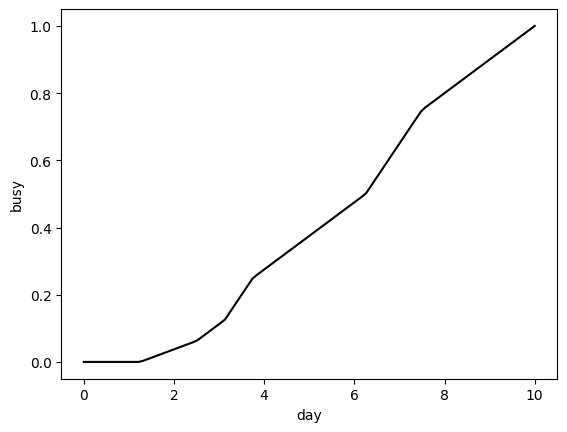

The piecewise linear function f(X, Y) is defined as follows:
domain(0, 10).
degree_day_busy(X, Y) :- X < 0, !, fail.
degree_day_busy(X, Y) :- X =< 1.25, !, max_list([0.0, 0.000000e+00 * X + 0.000000e+00], Y0), min_list([1.0, Y0], Y).
degree_day_busy(X, Y) :- X =< 2.5, !, max_list([0.0, 5.000000e-02 * X + -6.250000e-02], Y0), min_list([1.0, Y0], Y).
degree_day_busy(X, Y) :- X =< 3.125, !, max_list([0.0, 1.000000e-01 * X + -1.875000e-01], Y0), min_list([1.0, Y0], Y).
degree_day_busy(X, Y) :- X =< 3.75, !, max_list([0.0, 2.000000e-01 * X + -5.000000e-01], Y0), min_list([1.0, Y0], Y).
degree_day_busy(X, Y) :- X =< 5, !, max_list([0.0, 1.000000e-01 * X + -1.250000e-01], Y0), min_list([1.0, Y0], Y).
degree_day_busy(X, Y) :- X =< 6.25, !, max_list([0.0, 1.000000e-01 * X + -1.250000e-01], Y0), min_list([1.0, Y0], Y).
degree_day_busy(X, Y) :- X =< 7.5, !, max_list([0.0, 2.000000e-01 * X + -7.500000e-01], Y0), min_list([1.0, Y0], Y).
degree_day_busy(X, Y) :- X =< 8.125, !, max_list([0.0, 1.00000

In [2]:
degree_day_busy_points = [
  (0, 0),
  (1.25, 0),
  (2.5, 0.0625),
  (3.125, 0.125),
  (3.75, 0.25),
  (5, 0.375),
  (6.25, 0.5),
  (7.5, 0.75),
  (8.125, 0.8125),
  (10, 1)
]

plot_and_code('degree_day_busy', degree_day_busy_points)

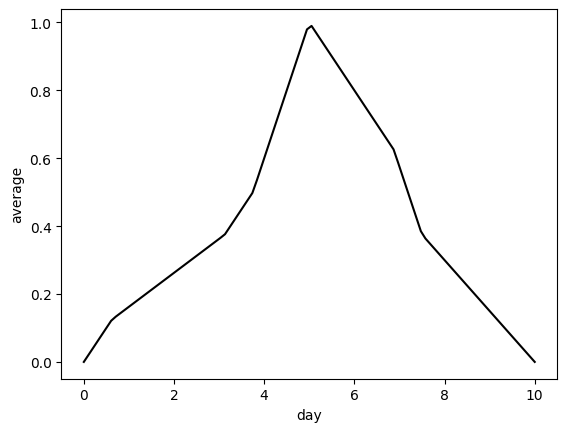

The piecewise linear function f(X, Y) is defined as follows:
domain(0, 10).
degree_day_average(X, Y) :- X < 0, !, fail.
degree_day_average(X, Y) :- X =< 0.625, !, max_list([0.0, 2.000000e-01 * X + 0.000000e+00], Y0), min_list([1.0, Y0], Y).
degree_day_average(X, Y) :- X =< 1.875, !, max_list([0.0, 1.000000e-01 * X + 6.250000e-02], Y0), min_list([1.0, Y0], Y).
degree_day_average(X, Y) :- X =< 3.125, !, max_list([0.0, 1.000000e-01 * X + 6.250000e-02], Y0), min_list([1.0, Y0], Y).
degree_day_average(X, Y) :- X =< 3.75, !, max_list([0.0, 2.000000e-01 * X + -2.500000e-01], Y0), min_list([1.0, Y0], Y).
degree_day_average(X, Y) :- X =< 5, !, max_list([0.0, 4.000000e-01 * X + -1.000000e+00], Y0), min_list([1.0, Y0], Y).
degree_day_average(X, Y) :- X =< 6.25, !, max_list([0.0, -2.000000e-01 * X + 2.000000e+00], Y0), min_list([1.0, Y0], Y).
degree_day_average(X, Y) :- X =< 6.875, !, max_list([0.0, -2.000000e-01 * X + 2.000000e+00], Y0), min_list([1.0, Y0], Y).
degree_day_average(X, Y) :- X =< 7.

In [3]:
degree_day_average_points = [
  (0, 0),
  (0.625, 0.125),
  (1.875, 0.25),
  (3.125, 0.375),
  (3.75, 0.5),
  (5, 1.0),
  (6.25, 0.75),
  (6.875, 0.625),
  (7.5, 0.375),
  (10, 0)
]

plot_and_code('degree_day_average', degree_day_average_points)

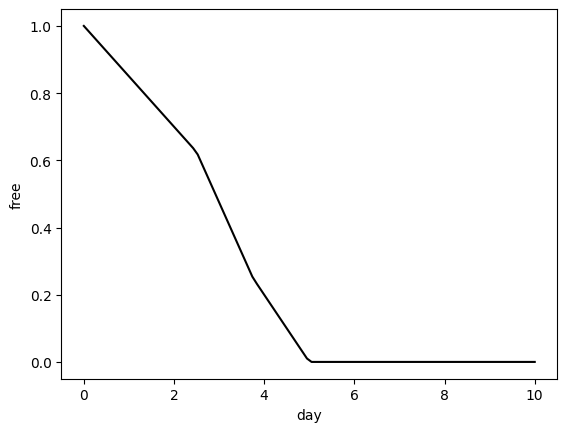

The piecewise linear function f(X, Y) is defined as follows:
domain(0, 10).
degree_day_free(X, Y) :- X < 0, !, fail.
degree_day_free(X, Y) :- X =< 2.5, !, max_list([0.0, -1.500000e-01 * X + 1.000000e+00], Y0), min_list([1.0, Y0], Y).
degree_day_free(X, Y) :- X =< 3.75, !, max_list([0.0, -3.000000e-01 * X + 1.375000e+00], Y0), min_list([1.0, Y0], Y).
degree_day_free(X, Y) :- X =< 4.375, !, max_list([0.0, -2.000000e-01 * X + 1.000000e+00], Y0), min_list([1.0, Y0], Y).
degree_day_free(X, Y) :- X =< 5, !, max_list([0.0, -2.000000e-01 * X + 1.000000e+00], Y0), min_list([1.0, Y0], Y).
degree_day_free(X, Y) :- X =< 10, !, max_list([0.0, 0.000000e+00 * X + 0.000000e+00], Y0), min_list([1.0, Y0], Y).
degree_day_free(X, Y) :- fail.


In [4]:
degree_day_free_points = [
  (0, 1.0),
  (2.5, 0.625),
  (3.75, 0.25),
  (4.375, 0.125),
  (5, 0),
  (10, 0)
]

plot_and_code('degree_day_free', degree_day_free_points)

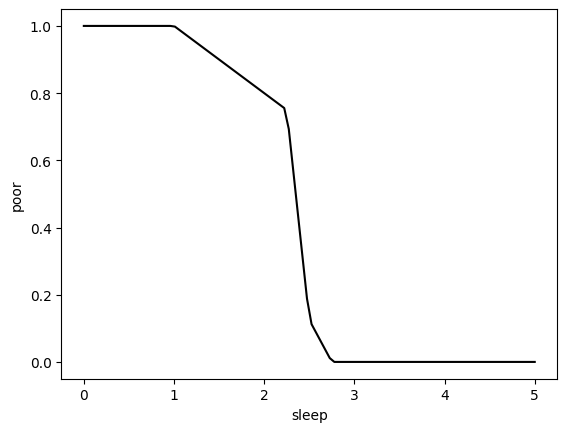

The piecewise linear function f(X, Y) is defined as follows:
domain(0, 5).
degree_sleep_poor(X, Y) :- X < 0, !, fail.
degree_sleep_poor(X, Y) :- X =< 1.0, !, max_list([0.0, 0.000000e+00 * X + 1.000000e+00], Y0), min_list([1.0, Y0], Y).
degree_sleep_poor(X, Y) :- X =< 2.25, !, max_list([0.0, -2.000000e-01 * X + 1.200000e+00], Y0), min_list([1.0, Y0], Y).
degree_sleep_poor(X, Y) :- X =< 2.5, !, max_list([0.0, -2.500000e+00 * X + 6.375000e+00], Y0), min_list([1.0, Y0], Y).
degree_sleep_poor(X, Y) :- X =< 2.75, !, max_list([0.0, -5.000000e-01 * X + 1.375000e+00], Y0), min_list([1.0, Y0], Y).
degree_sleep_poor(X, Y) :- X =< 5, !, max_list([0.0, 0.000000e+00 * X + 0.000000e+00], Y0), min_list([1.0, Y0], Y).
degree_sleep_poor(X, Y) :- fail.


In [5]:
degree_sleep_poor_points = [
  (0, 1.0),
  (1.0, 1.0),
  (2.25, 0.75),
  (2.5, 0.125),
  (2.75, 0.0),
  (5, 0)
]

plot_and_code('degree_sleep_poor', degree_sleep_poor_points)

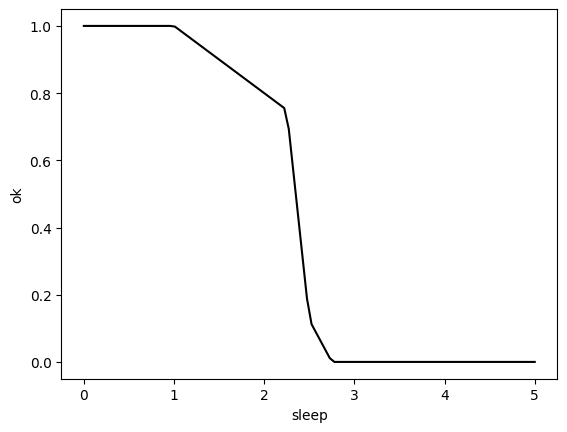

The piecewise linear function f(X, Y) is defined as follows:
domain(0, 5).
degree_sleep_ok(X, Y) :- X < 0, !, fail.
degree_sleep_ok(X, Y) :- X =< 1.0, !, max_list([0.0, 0.000000e+00 * X + 1.000000e+00], Y0), min_list([1.0, Y0], Y).
degree_sleep_ok(X, Y) :- X =< 2.25, !, max_list([0.0, -2.000000e-01 * X + 1.200000e+00], Y0), min_list([1.0, Y0], Y).
degree_sleep_ok(X, Y) :- X =< 2.5, !, max_list([0.0, -2.500000e+00 * X + 6.375000e+00], Y0), min_list([1.0, Y0], Y).
degree_sleep_ok(X, Y) :- X =< 2.75, !, max_list([0.0, -5.000000e-01 * X + 1.375000e+00], Y0), min_list([1.0, Y0], Y).
degree_sleep_ok(X, Y) :- X =< 5, !, max_list([0.0, 0.000000e+00 * X + 0.000000e+00], Y0), min_list([1.0, Y0], Y).
degree_sleep_ok(X, Y) :- fail.


In [6]:
degree_sleep_ok_points = [
  (0.0, 0.0),
  (0.625, 0.125),
  (0.25, 0.128),
  (0.875, 0.3),
  (1.15, 0.375),
  (2.125, 0.857),
  (2.335, 0.9),
  (2.5, 1),
  (3.375, 1),
  (3.5, 0.125),
  (3.75, 0),
  (5, 0)
]

plot_and_code('degree_sleep_ok', degree_sleep_poor_points)

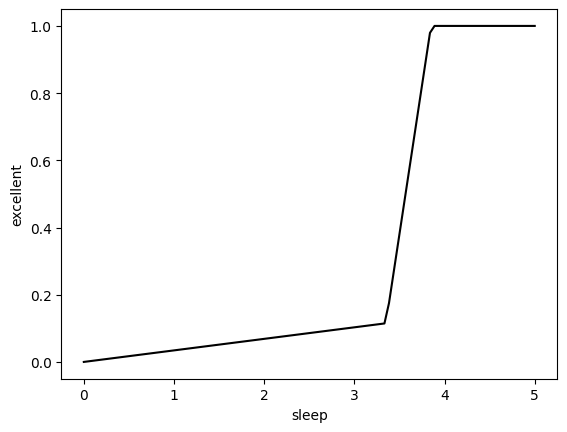

The piecewise linear function f(X, Y) is defined as follows:
domain(0.0, 5).
degree_sleep_excellent(X, Y) :- X < 0.0, !, fail.
degree_sleep_excellent(X, Y) :- X =< 3.35, !, max_list([0.0, 3.432836e-02 * X + 0.000000e+00], Y0), min_list([1.0, Y0], Y).
degree_sleep_excellent(X, Y) :- X =< 3.85, !, max_list([0.0, 1.770000e+00 * X + -5.814500e+00], Y0), min_list([1.0, Y0], Y).
degree_sleep_excellent(X, Y) :- X =< 5, !, max_list([0.0, 2.664535e-15 * X + 1.000000e+00], Y0), min_list([1.0, Y0], Y).
degree_sleep_excellent(X, Y) :- fail.


In [7]:
degree_sleep_excellent_points = [
  (0.0, 0.0),
  (3.35, 0.115),
  (3.85, 1.0),
  (5, 1)
]

plot_and_code('degree_sleep_excellent', degree_sleep_excellent_points)

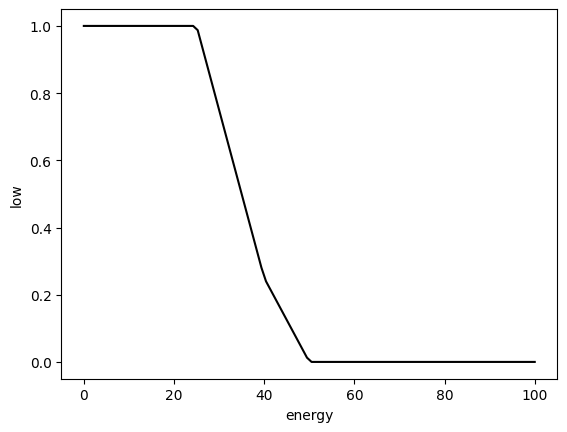

The piecewise linear function f(X, Y) is defined as follows:
domain(0, 100).
degree_energy_low(X, Y) :- X < 0, !, fail.
degree_energy_low(X, Y) :- X =< 25, !, max_list([0.0, 0.000000e+00 * X + 1.000000e+00], Y0), min_list([1.0, Y0], Y).
degree_energy_low(X, Y) :- X =< 40, !, max_list([0.0, -5.000000e-02 * X + 2.250000e+00], Y0), min_list([1.0, Y0], Y).
degree_energy_low(X, Y) :- X =< 50, !, max_list([0.0, -2.500000e-02 * X + 1.250000e+00], Y0), min_list([1.0, Y0], Y).
degree_energy_low(X, Y) :- X =< 100, !, max_list([0.0, 0.000000e+00 * X + 0.000000e+00], Y0), min_list([1.0, Y0], Y).
degree_energy_low(X, Y) :- fail.


In [8]:
degree_energy_low_points= [
  (0, 1),
  (25, 1),
  (40, 0.25),
  (50, 0),
  (100, 0)
]

plot_and_code('degree_energy_low', degree_energy_low_points)

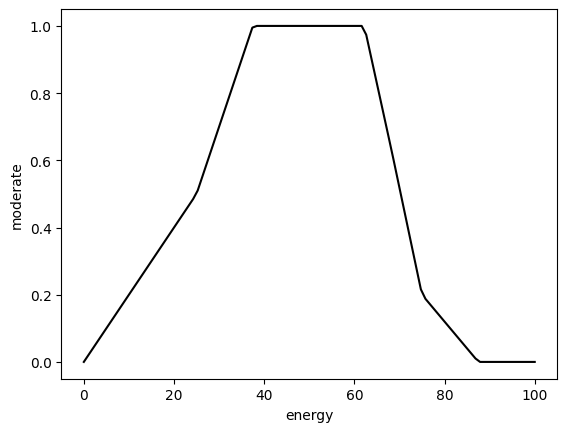

The piecewise linear function f(X, Y) is defined as follows:
domain(0.0, 100).
degree_energy_moderate(X, Y) :- X < 0.0, !, fail.
degree_energy_moderate(X, Y) :- X =< 25, !, max_list([0.0, 2.000000e-02 * X + 0.000000e+00], Y0), min_list([1.0, Y0], Y).
degree_energy_moderate(X, Y) :- X =< 37.5, !, max_list([0.0, 4.000000e-02 * X + -5.000000e-01], Y0), min_list([1.0, Y0], Y).
degree_energy_moderate(X, Y) :- X =< 62.2, !, max_list([0.0, 5.551115e-17 * X + 1.000000e+00], Y0), min_list([1.0, Y0], Y).
degree_energy_moderate(X, Y) :- X =< 68.4, !, max_list([0.0, -6.129032e-02 * X + 4.812258e+00], Y0), min_list([1.0, Y0], Y).
degree_energy_moderate(X, Y) :- X =< 75, !, max_list([0.0, -6.363636e-02 * X + 4.972727e+00], Y0), min_list([1.0, Y0], Y).
degree_energy_moderate(X, Y) :- X =< 87.5, !, max_list([0.0, -1.600000e-02 * X + 1.400000e+00], Y0), min_list([1.0, Y0], Y).
degree_energy_moderate(X, Y) :- X =< 100, !, max_list([0.0, 0.000000e+00 * X + 0.000000e+00], Y0), min_list([1.0, Y0], Y).
degr

In [9]:
degree_energy_moderate = [
  (0.0, 0.0),
  (25, 0.5),
  (37.5, 1),
  (62.2, 1),
  (68.4, 0.62),
  (75, 0.2),
  (87.5, 0),
  (100, 0)
]

plot_and_code('degree_energy_moderate', degree_energy_moderate)

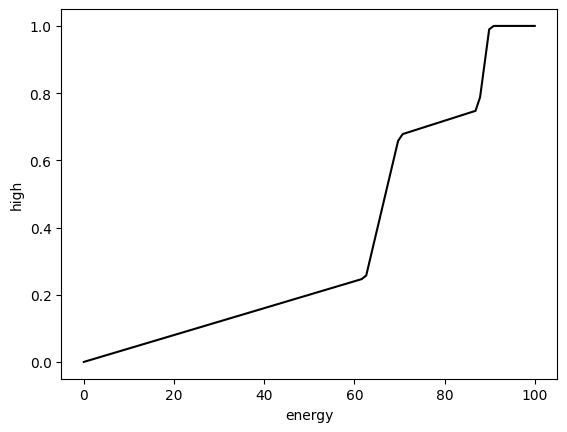

The piecewise linear function f(X, Y) is defined as follows:
domain(0, 100).
degree_energy_high(X, Y) :- X < 0, !, fail.
degree_energy_high(X, Y) :- X =< 62.5, !, max_list([0.0, 4.000000e-03 * X + 0.000000e+00], Y0), min_list([1.0, Y0], Y).
degree_energy_high(X, Y) :- X =< 70, !, max_list([0.0, 5.666667e-02 * X + -3.291667e+00], Y0), min_list([1.0, Y0], Y).
degree_energy_high(X, Y) :- X =< 87.5, !, max_list([0.0, 4.285714e-03 * X + 3.750000e-01], Y0), min_list([1.0, Y0], Y).
degree_energy_high(X, Y) :- X =< 90, !, max_list([0.0, 1.000000e-01 * X + -8.000000e+00], Y0), min_list([1.0, Y0], Y).
degree_energy_high(X, Y) :- X =< 100, !, max_list([0.0, 0.000000e+00 * X + 1.000000e+00], Y0), min_list([1.0, Y0], Y).
degree_energy_high(X, Y) :- fail.


In [10]:
degree_energy_high_points = [
  (0, 0),
  (62.5, 0.25),
  (70, 0.675),
  (87.5, 0.75),
  (90, 1),
  (100, 1)
]

plot_and_code('degree_energy_high', degree_energy_high_points)

In [11]:
rule_points = [
  [
    ('degree_day_busy', degree_day_busy_points),
    ('degree_sleep_poor', degree_sleep_poor_points),
    ('degree_energy_low', degree_energy_low_points),
    min,
  ],
  [
    ('degree_day_average', degree_day_average_points),
    ('degree_sleep_ok', degree_sleep_ok_points),
    ('degree_energy_moderate', degree_energy_moderate),
    min,
  ],
  [
    ('degree_day_free', degree_day_free_points),
    ('degree_sleep_excellent', degree_sleep_excellent_points),
    ('degree_energy_high', degree_energy_high_points),
    max,
  ],
]


degree_day_busy [(0, 0), (1.25, 0), (2.5, 0.0625), (3.125, 0.125), (3.75, 0.25), (5, 0.375), (6.25, 0.5), (7.5, 0.75), (8.125, 0.8125), (10, 1)]
degree_sleep_poor [(0, 1.0), (1.0, 1.0), (2.25, 0.75), (2.5, 0.125), (2.75, 0.0), (5, 0)]
degree_energy_low [(0, 1), (25, 1), (40, 0.25), (50, 0), (100, 0)]
degree_day_average [(0, 0), (0.625, 0.125), (1.875, 0.25), (3.125, 0.375), (3.75, 0.5), (5, 1.0), (6.25, 0.75), (6.875, 0.625), (7.5, 0.375), (10, 0)]
degree_sleep_ok [(0.0, 0.0), (0.625, 0.125), (0.25, 0.128), (0.875, 0.3), (1.15, 0.375), (2.125, 0.857), (2.335, 0.9), (2.5, 1), (3.375, 1), (3.5, 0.125), (3.75, 0), (5, 0)]
degree_energy_moderate [(0.0, 0.0), (25, 0.5), (37.5, 1), (62.2, 1), (68.4, 0.62), (75, 0.2), (87.5, 0), (100, 0)]
degree_day_free [(0, 1.0), (2.5, 0.625), (3.75, 0.25), (4.375, 0.125), (5, 0), (10, 0)]
degree_sleep_excellent [(0.0, 0.0), (3.35, 0.115), (3.85, 1.0), (5, 1)]
degree_energy_high [(0, 0), (62.5, 0.25), (70, 0.675), (87.5, 0.75), (90, 1), (100, 1)]


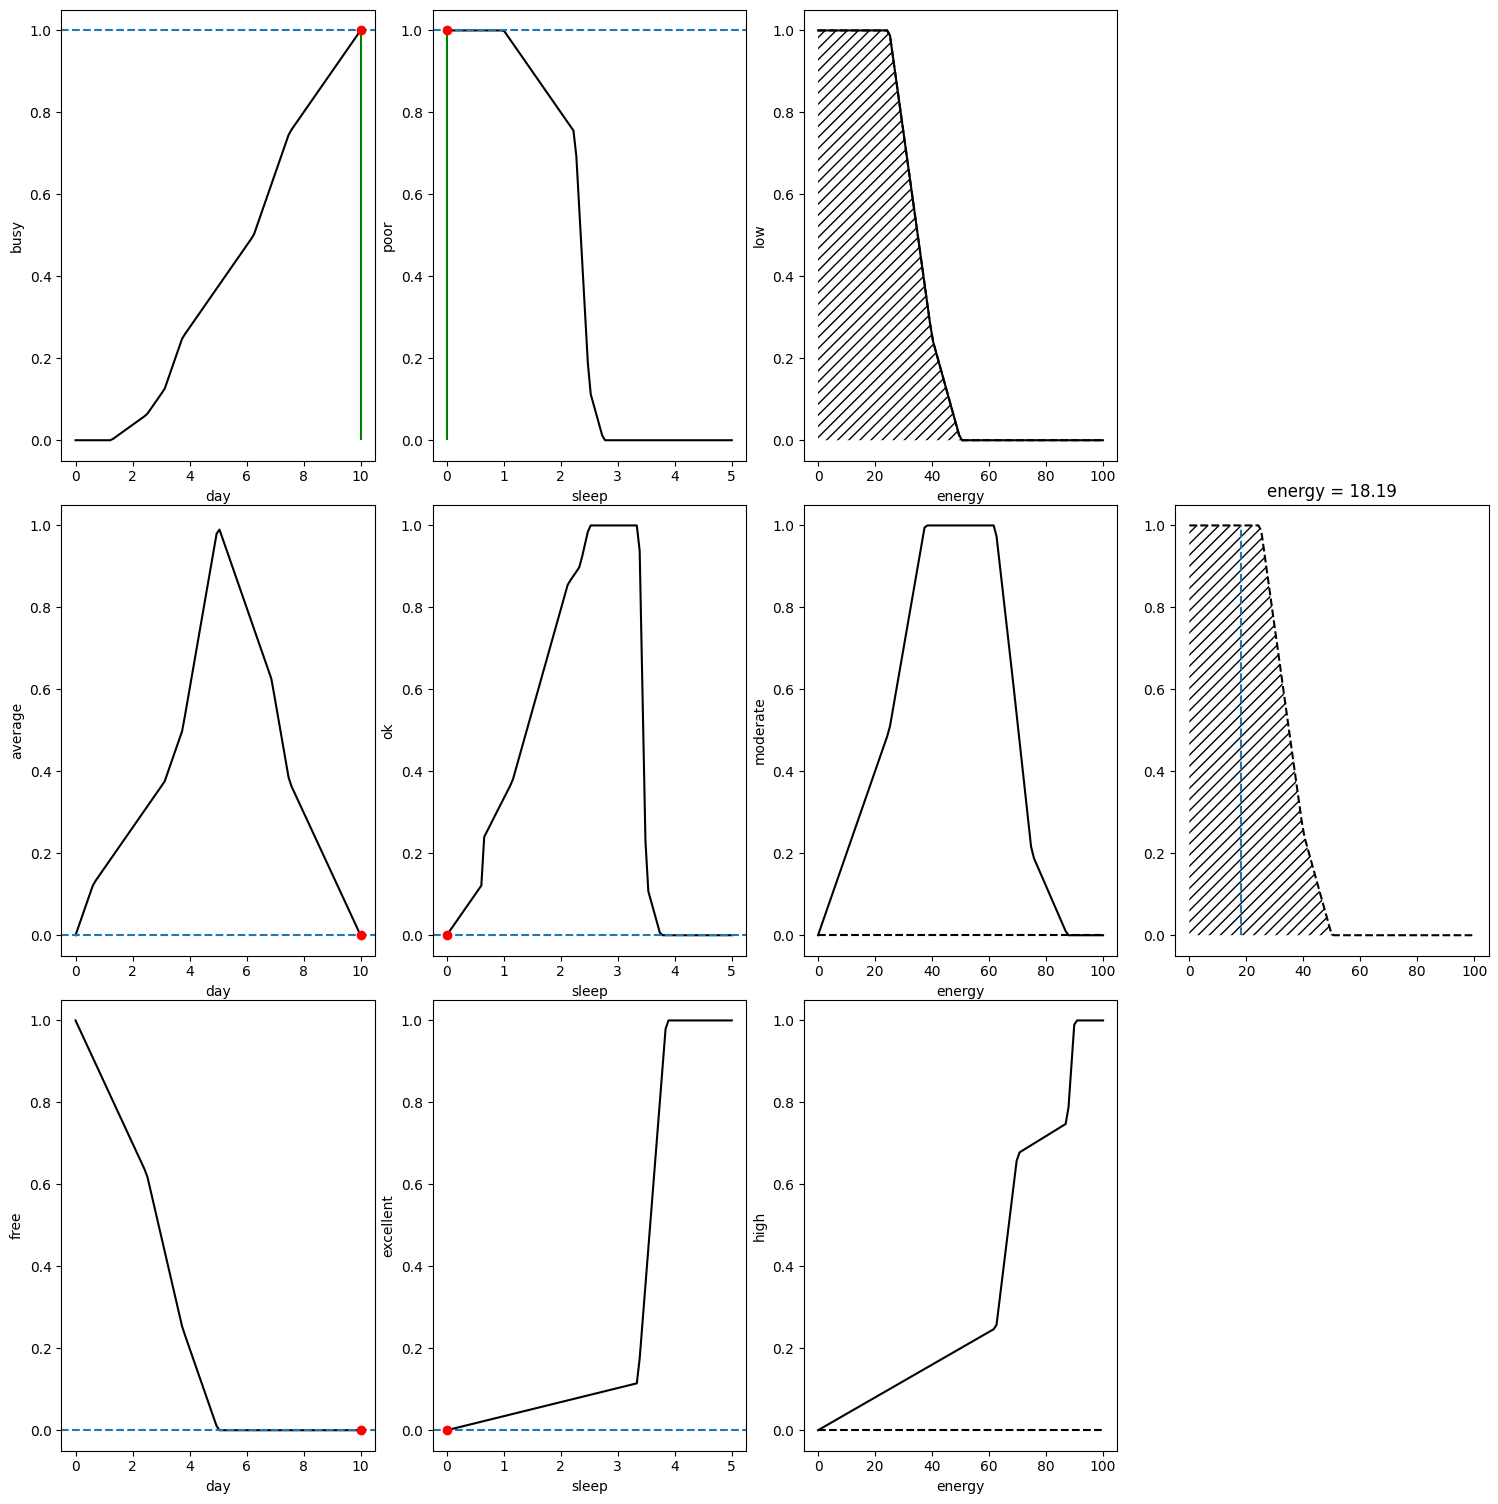

In [17]:
fig, ax = plt.subplots(3, 4, figsize=(15, 15))
fig.delaxes(ax[0][-1])
fig.delaxes(ax[2][-1])
fig.tight_layout()

# Input data
num = 100
sleep_value = 0
day_value = 10


for i in range(len(rule_points)):
  for j in range(len(rule_points[1]) - 1):
    fun_name, points = rule_points[i][j]
    print(fun_name, points)
    plot_degree_curve(fun_name, points, ax=ax[i][j], num=num)


def membership(points, num):
  x_min = min([x for x, _ in points])
  x_max = max([x for x, _ in points])
  x_axis = np.linspace(x_min, x_max, num=num)
  y_axis = np.vectorize(lambda x: f(x, points))(x_axis)
  return x_axis, y_axis


cons = []
for i in range(len(rule_points)):
  [[_, day_points], [_, sleep_points], [_, energy_points], op] = rule_points[i]

  y_day = f(day_value, day_points)
  y_sleep = f(sleep_value, sleep_points)
  x_energy, y_energy = membership(energy_points, num)
  y_eval = np.minimum(op(y_day, y_sleep), y_energy)
  cons.append((x_energy, y_energy, y_eval))

  # Day
  ax[i][0].axhline(y_day, linestyle='--')
  ax[i][0].stem(day_value, y_day, linefmt='g-', markerfmt='r')
  ax[i][0].set_ylim(-0.05, 1.05)

  # Sleep
  ax[i][1].axhline(y_sleep, linestyle='--')
  ax[i][1].stem(sleep_value, y_sleep, linefmt='g-', markerfmt='r')
  ax[i][1].set_ylim(-0.05, 1.05)

  # Energy
  ax[i][-2].plot(x_energy, y_eval, linestyle='dashed', color='black')
  ax[i][-2].fill_between(x_energy, np.zeros_like(x_energy), y_eval,
                         alpha=0.0, hatch='///')
  ax[i][-2].set_ylim(-0.05, 1.05)


x_agg = cons[0][0]
y_agg = np.array([y_eval for _, _, y_eval in cons]).max(axis=0)
ax[1][-1].plot(x_agg, y_agg, color='black', linestyle='dashed')
ax[1][-1].fill_between(x_agg, np.zeros_like(y_agg), y_agg, hatch='///', fc='green', alpha=0.0)

# Compute x_centroid
x_centroid = x_agg @ y_agg.T / y_agg.sum()
y_upper_bound = y_agg[np.argmin(np.abs(x_agg - x_centroid))]
ax[1][-1].set_title(f'energy = {x_centroid:.2f}')
ax[1][-1].vlines([x_centroid], [0], [y_upper_bound], linestyles='dashed')
ax[1][-1].set_ylim(-0.05, 1.05)

plt.show()